In [4]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/network-intrusion-dataset/Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv
/kaggle/input/network-intrusion-dataset/Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv
/kaggle/input/network-intrusion-dataset/Tuesday-WorkingHours.pcap_ISCX.csv
/kaggle/input/network-intrusion-dataset/Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv
/kaggle/input/network-intrusion-dataset/Monday-WorkingHours.pcap_ISCX.csv
/kaggle/input/network-intrusion-dataset/Friday-WorkingHours-Morning.pcap_ISCX.csv
/kaggle/input/network-intrusion-dataset/Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv
/kaggle/input/network-intrusion-dataset/Wednesday-workingHours.pcap_ISCX.csv


In [5]:
# Path to the file
file_path = '/kaggle/input/network-intrusion-dataset/Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv'

# Load the CSV file into a DataFrame
df = pd.read_csv(file_path)

# nom de colonnes:
print(df.columns)


Index([' Destination Port', ' Flow Duration', ' Total Fwd Packets',
       ' Total Backward Packets', 'Total Length of Fwd Packets',
       ' Total Length of Bwd Packets', ' Fwd Packet Length Max',
       ' Fwd Packet Length Min', ' Fwd Packet Length Mean',
       ' Fwd Packet Length Std', 'Bwd Packet Length Max',
       ' Bwd Packet Length Min', ' Bwd Packet Length Mean',
       ' Bwd Packet Length Std', 'Flow Bytes/s', ' Flow Packets/s',
       ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Max', ' Flow IAT Min',
       'Fwd IAT Total', ' Fwd IAT Mean', ' Fwd IAT Std', ' Fwd IAT Max',
       ' Fwd IAT Min', 'Bwd IAT Total', ' Bwd IAT Mean', ' Bwd IAT Std',
       ' Bwd IAT Max', ' Bwd IAT Min', 'Fwd PSH Flags', ' Bwd PSH Flags',
       ' Fwd URG Flags', ' Bwd URG Flags', ' Fwd Header Length',
       ' Bwd Header Length', 'Fwd Packets/s', ' Bwd Packets/s',
       ' Min Packet Length', ' Max Packet Length', ' Packet Length Mean',
       ' Packet Length Std', ' Packet Length Variance', '

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packag

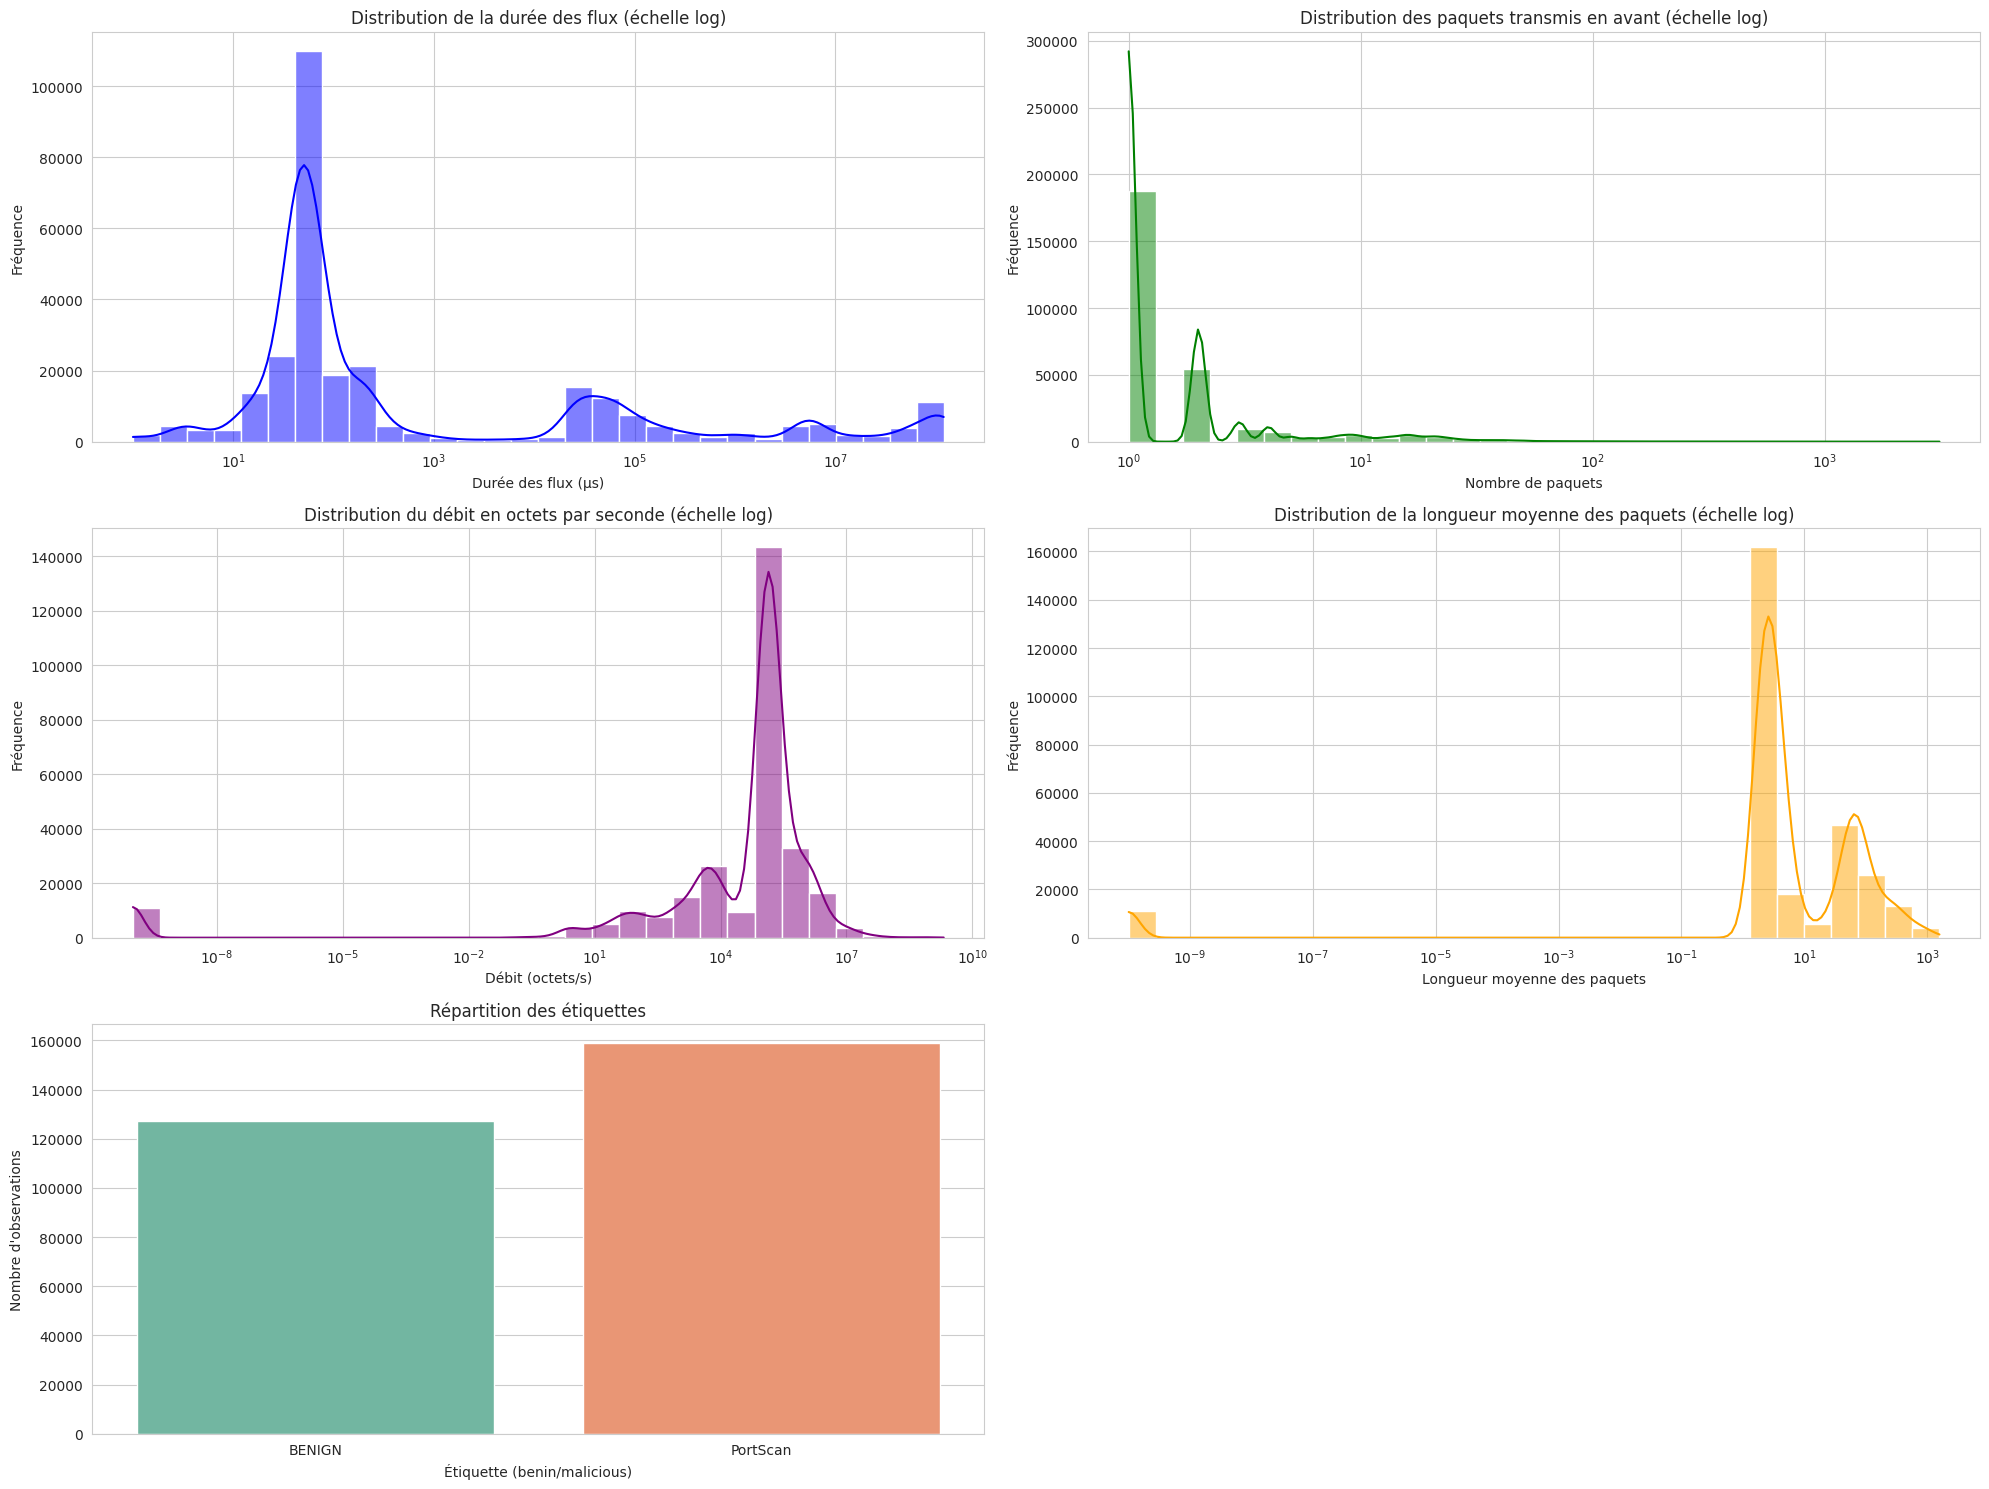

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Charger les données
file_path = '/kaggle/input/network-intrusion-dataset/Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv'
df = pd.read_csv(file_path)

# Nettoyer les noms des colonnes
df.columns = df.columns.str.strip()

# Colonnes importantes
important_columns = ['Flow Duration', 'Total Fwd Packets', 'Flow Bytes/s', 'Packet Length Mean', 'Label']

# Gérer les valeurs non numériques
df[important_columns[:-1]] = df[important_columns[:-1]].apply(pd.to_numeric, errors='coerce')

# Supprimer les lignes avec des valeurs manquantes ou infinies
df = df.replace([np.inf, -np.inf], np.nan).dropna(subset=important_columns)

# Remplacer les zéros par une petite valeur pour éviter le problème de log(0)
df[important_columns[:-1]] = df[important_columns[:-1]].replace(0, 1e-10)

# Définir le style de visualisation
sns.set_style("whitegrid")

# Créer les visualisations avec une échelle logarithmique
fig, axes = plt.subplots(3, 2, figsize=(20, 15))

# Histogramme : Flow Duration (axe log)
sns.histplot(df['Flow Duration'], bins=30, kde=True, ax=axes[0, 0], color="blue", log_scale=(True, False))
axes[0, 0].set_title("Distribution de la durée des flux (échelle log)")
axes[0, 0].set_xlabel("Durée des flux (µs)")
axes[0, 0].set_ylabel("Fréquence")

# Histogramme : Total Fwd Packets (axe log)
sns.histplot(df['Total Fwd Packets'], bins=30, kde=True, ax=axes[0, 1], color="green", log_scale=(True, False))
axes[0, 1].set_title("Distribution des paquets transmis en avant (échelle log)")
axes[0, 1].set_xlabel("Nombre de paquets")
axes[0, 1].set_ylabel("Fréquence")

# Histogramme : Flow Bytes/s (axe log)
sns.histplot(df['Flow Bytes/s'], bins=30, kde=True, ax=axes[1, 0], color="purple", log_scale=(True, False))
axes[1, 0].set_title("Distribution du débit en octets par seconde (échelle log)")
axes[1, 0].set_xlabel("Débit (octets/s)")
axes[1, 0].set_ylabel("Fréquence")

# Histogramme : Packet Length Mean (axe log)
sns.histplot(df['Packet Length Mean'], bins=30, kde=True, ax=axes[1, 1], color="orange", log_scale=(True, False))
axes[1, 1].set_title("Distribution de la longueur moyenne des paquets (échelle log)")
axes[1, 1].set_xlabel("Longueur moyenne des paquets")
axes[1, 1].set_ylabel("Fréquence")

# Diagramme en barres : Label
sns.countplot(x='Label', data=df, ax=axes[2, 0], palette="Set2")
axes[2, 0].set_title("Répartition des étiquettes")
axes[2, 0].set_xlabel("Étiquette (benin/malicious)")
axes[2, 0].set_ylabel("Nombre d'observations")

# Supprimer le sous-graphe inutilisé
fig.delaxes(axes[2, 1])

# Ajuster la mise en page
plt.tight_layout()
plt.show()


In [7]:
print(len(df.columns))

79



Pour effectuer une étude de corrélation sur les données et identifier les colonnes à supprimer en cas de corrélation élevée, voici les étapes à suivre
1. **Calculer la matrice de corrélation** : Utiliser la méthode `corr()` de pandas pour obtenir les corrélations entre les colonnes numériques.
2. **Visualiser la matrice de corrélation** : Utiliser un **heatmap** avec `seaborn` pour visualiser les relations.
3. **Identifier les colonnes fortement corrélées** : Si la corrélation entre deux colonnes est trop élevée (par exemple, supérieure à 0.9), envisager de supprimer lune delles.


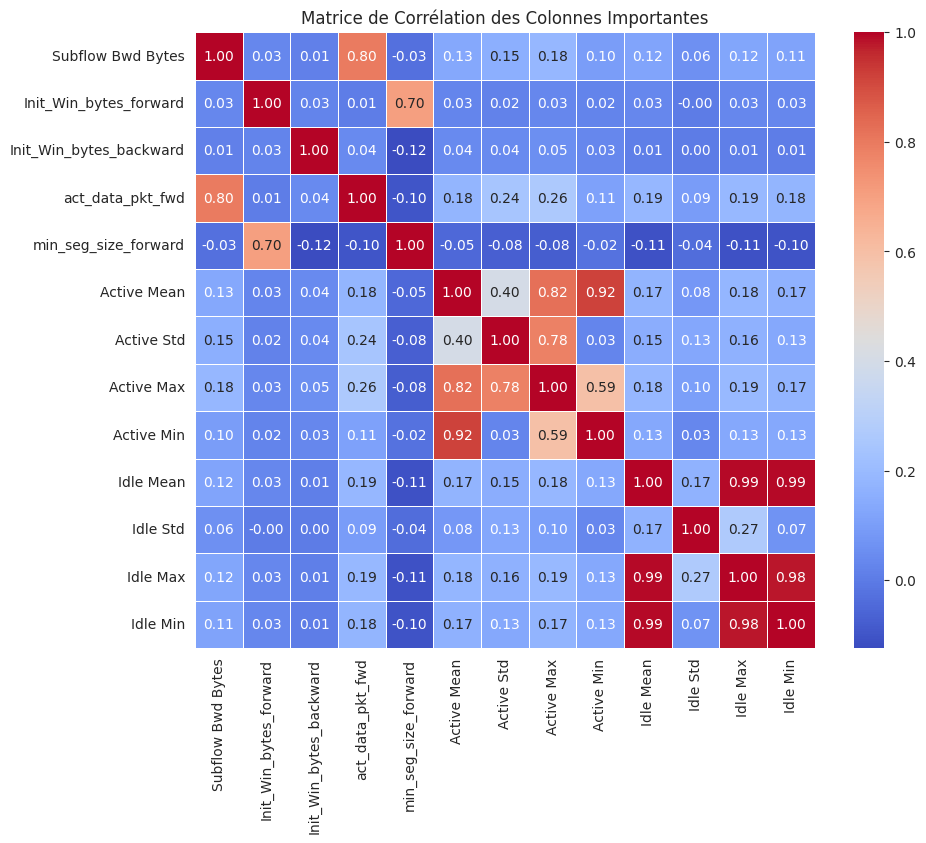

Paires de colonnes fortement corrélées (> 0.9):
('Active Min', 'Active Mean')
('Idle Max', 'Idle Mean')
('Idle Min', 'Idle Mean')
('Idle Min', 'Idle Max')


In [8]:
# Calculer la matrice de corrélation pour quelque colonne afin davoir une belle visualization
correlation_matrix = df[df.columns[65:-1]].corr() # -1 pour enlever la derniere colummne qui est le label

# Visualiser la matrice de corrélation avec un heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Matrice de Corrélation des Colonnes Importantes")
plt.show()

# Identifier les paires de colonnes fortement corrélées
threshold = 0.9  # Définir le seuil de corrélation
high_corr_pairs = []

# Trouver les paires de colonnes avec une corrélation supérieure au seuil
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > threshold:
            high_corr_pairs.append((correlation_matrix.columns[i], correlation_matrix.columns[j]))

print(f"Paires de colonnes fortement corrélées (> {threshold}):")
for pair in high_corr_pairs:
    print(pair)

In [9]:
# Calculer la matrice de corrélation pour toutes les colonnes afin d'éliminer les colonnes fortement corrélées
correlation_matrix = df[df.columns[:-1]].corr()  # -1 pour enlever la dernière colonne qui est le label

# Identifier les paires de colonnes fortement corrélées
threshold = 0.9  # Définir le seuil de corrélation
high_corr_pairs = []

# Trouver les paires de colonnes avec une corrélation supérieure au seuil
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        corr_value = correlation_matrix.iloc[i, j]
        if abs(corr_value) > threshold:
            high_corr_pairs.append((correlation_matrix.columns[i], correlation_matrix.columns[j], corr_value))

print(f"Paires de colonnes fortement corrélées (> {threshold}):")
for pair in high_corr_pairs:
    print(f"{pair[0]} - {pair[1]} : Corrélation = {pair[2]:.3f}")

Paires de colonnes fortement corrélées (> 0.9):
Total Backward Packets - Total Fwd Packets : Corrélation = 0.962
Total Length of Bwd Packets - Total Fwd Packets : Corrélation = 0.948
Total Length of Bwd Packets - Total Backward Packets : Corrélation = 0.979
Fwd Packet Length Std - Fwd Packet Length Max : Corrélation = 0.944
Bwd Packet Length Mean - Bwd Packet Length Max : Corrélation = 0.912
Bwd Packet Length Std - Bwd Packet Length Max : Corrélation = 0.947
Flow IAT Std - Flow IAT Mean : Corrélation = 0.960
Flow IAT Max - Flow IAT Std : Corrélation = 0.902
Fwd IAT Total - Flow Duration : Corrélation = 0.999
Fwd IAT Mean - Flow IAT Mean : Corrélation = 0.980
Fwd IAT Mean - Flow IAT Std : Corrélation = 0.951
Fwd IAT Max - Flow IAT Std : Corrélation = 0.901
Fwd IAT Max - Flow IAT Max : Corrélation = 0.997
Fwd IAT Min - Flow IAT Mean : Corrélation = 0.914
Fwd IAT Min - Fwd IAT Mean : Corrélation = 0.966
Bwd IAT Total - Flow Duration : Corrélation = 0.988
Bwd IAT Total - Fwd IAT Total : Co

In [10]:
# Identifier les paires de colonnes fortement corrélées et déterminer les colonnes à supprimer
to_drop = set()

# Trouver les paires de colonnes avec une corrélation supérieure au seuil
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        corr_value = correlation_matrix.iloc[i, j]
        if abs(corr_value) > threshold:
            # Ajouter la colonne à supprimer (la deuxième colonne de la paire corrélée)
            to_drop.add(correlation_matrix.columns[i])

# Afficher les colonnes à supprimer
print(f"Colonnes à supprimer : {to_drop}")

# Créer un nouveau DataFrame avec les colonnes restantes
df_cleaned = df.drop(columns=to_drop)

# Vérifier les premières lignes du DataFrame nettoyé
print(df_cleaned.head())


Colonnes à supprimer : {'Active Min', 'Fwd IAT Min', 'Fwd Header Length', 'Subflow Fwd Packets', 'Bwd Packet Length Std', 'Fwd Header Length.1', 'Fwd IAT Total', 'Fwd IAT Mean', 'Bwd IAT Min', 'Bwd Header Length', 'Bwd Packet Length Mean', 'Packet Length Std', 'Flow IAT Std', 'Total Backward Packets', 'Idle Min', 'Idle Max', 'Fwd IAT Max', 'Avg Fwd Segment Size', 'Bwd IAT Mean', 'SYN Flag Count', 'Fwd Packet Length Std', 'Average Packet Size', 'Fwd Packets/s', 'ECE Flag Count', 'Subflow Fwd Bytes', 'Bwd IAT Total', 'Packet Length Variance', 'Idle Mean', 'Max Packet Length', 'Flow IAT Max', 'Total Length of Bwd Packets', 'Packet Length Mean', 'Subflow Bwd Bytes', 'Bwd IAT Max', 'Avg Bwd Segment Size', 'Subflow Bwd Packets'}
   Destination Port  Flow Duration  Total Fwd Packets  \
0                22        1266342                 41   
1                22        1319353                 41   
2                22            160                  1   
3                22        1303488     

In [11]:
print(len(df_cleaned.columns)) #de 78 a 42

43


In [12]:
df_cleaned.describe()


,Destination Port,Flow Duration,Total Fwd Packets,Total Length of Fwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Bwd Packet Length Max,Bwd Packet Length Min,Flow Bytes/s,...,Bwd Avg Packets/Bulk,Bwd Avg Bulk Rate,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Idle Std
count,286096.000000,2.860960e+05,286096.000000,286096.000000,286096.000000,286096.000000,286096.000000,286096.000000,286096.000000,2.860960e+05,...,286096.0,286096.0,286096.000000,286096.000000,286096.000000,286096.000000,2.860960e+05,2.860960e+05,2.860960e+05,2.860960e+05
mean,8015.814957,5.386306e+06,3.476305,233.703330,81.132277,10.360362,24.164366,185.887101,27.510668,1.117593e+06,...,0.0,0.0,11150.420831,1146.227102,1.730720,29.080511,3.413634e+04,2.297963e+04,7.795819e+04,6.128327e+04
std,15346.254906,2.193700e+07,19.527596,1866.714695,327.968919,24.252211,78.429008,586.063169,54.237347,2.568310e+07,...,0.0,0.0,14275.057102,6627.821754,14.906899,8.013593,4.662323e+05,2.624737e+05,7.347312e+05,1.217802e+06
min,0.000000,-1.300000e+01,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.930000e+08,...,0.0,0.0,-1.000000,-1.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,80.000000,4.400000e+01,1.000000,0.000000,0.000000,0.000000,0.000000,6.000000,6.000000,7.888408e+03,...,0.0,0.0,242.000000,-1.000000,0.000000,20.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,1108.000000,6.500000e+01,1.000000,2.000000,2.000000,2.000000,2.000000,6.000000,6.000000,1.250000e+05,...,0.0,0.0,1024.000000,0.000000,0.000000,24.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,6861.250000,2.382200e+04,2.000000,62.000000,37.000000,6.000000,34.000000,72.000000,6.000000,1.904762e+05,...,0.0,0.0,29200.000000,0.000000,1.000000,40.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,65389.000000,1.199999e+08,3119.000000,232349.000000,13929.000000,1472.000000,3412.938776,10136.000000,1460.000000,2.070000e+09,...,0.0,0.0,65535.000000,65535.000000,2056.000000,60.000000,1.100000e+08,7.050000e+07,1.100000e+08,7.050000e+07


In [13]:
# Vérifier les valeurs manquantes dans df_cleaned
missing_values = df_cleaned.isnull().sum()

# Afficher le nombre de valeurs manquantes par colonne
print(missing_values)


Destination Port               0
Flow Duration                  0
Total Fwd Packets              0
Total Length of Fwd Packets    0
Fwd Packet Length Max          0
Fwd Packet Length Min          0
Fwd Packet Length Mean         0
Bwd Packet Length Max          0
Bwd Packet Length Min          0
Flow Bytes/s                   0
Flow Packets/s                 0
Flow IAT Mean                  0
Flow IAT Min                   0
Fwd IAT Std                    0
Bwd IAT Std                    0
Fwd PSH Flags                  0
Bwd PSH Flags                  0
Fwd URG Flags                  0
Bwd URG Flags                  0
Bwd Packets/s                  0
Min Packet Length              0
FIN Flag Count                 0
RST Flag Count                 0
PSH Flag Count                 0
ACK Flag Count                 0
URG Flag Count                 0
CWE Flag Count                 0
Down/Up Ratio                  0
Fwd Avg Bytes/Bulk             0
Fwd Avg Packets/Bulk           0
Fwd Avg Bu

In [14]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Séparer les caractéristiques (X) et l'étiquette (y)
X = df_cleaned.drop(columns=['Label'])  # Remplacer 'label' par le nom réel de votre colonne d'étiquette
y = df_cleaned['Label']

# Initialiser les scalers
min_max_scaler = MinMaxScaler()
standard_scaler = StandardScaler()

# Normaliser X
X_normalized = pd.DataFrame(min_max_scaler.fit_transform(X), columns=X.columns)

# Standardiser X
X_standardized = pd.DataFrame(standard_scaler.fit_transform(X), columns=X.columns)

# Afficher les premières lignes des résultats
print("Normalized DataFrame:")

print(X_normalized.head())

print("\nStandardized DataFrame:")
print(X_standardized.head())


Normalized DataFrame:
   Destination Port  Flow Duration  Total Fwd Packets  \
0          0.000336   1.055296e-02           0.012829   
1          0.000336   1.099472e-02           0.012829   
2          0.000336   1.441667e-06           0.000000   
3          0.000336   1.086251e-02           0.012829   
4          0.541314   7.500002e-07           0.000000   

   Total Length of Fwd Packets  Fwd Packet Length Max  Fwd Packet Length Min  \
0                     0.011466               0.032737                    0.0   
1                     0.011466               0.032737                    0.0   
2                     0.000000               0.000000                    0.0   
3                     0.011741               0.032737                    0.0   
4                     0.000000               0.000000                    0.0   

   Fwd Packet Length Mean  Bwd Packet Length Max  Bwd Packet Length Min  \
0                0.019038                0.09629                    0.0   
1   

In [15]:
df_cleaned.columns

Index(['Destination Port', 'Flow Duration', 'Total Fwd Packets',
       'Total Length of Fwd Packets', 'Fwd Packet Length Max',
       'Fwd Packet Length Min', 'Fwd Packet Length Mean',
       'Bwd Packet Length Max', 'Bwd Packet Length Min', 'Flow Bytes/s',
       'Flow Packets/s', 'Flow IAT Mean', 'Flow IAT Min', 'Fwd IAT Std',
       'Bwd IAT Std', 'Fwd PSH Flags', 'Bwd PSH Flags', 'Fwd URG Flags',
       'Bwd URG Flags', 'Bwd Packets/s', 'Min Packet Length', 'FIN Flag Count',
       'RST Flag Count', 'PSH Flag Count', 'ACK Flag Count', 'URG Flag Count',
       'CWE Flag Count', 'Down/Up Ratio', 'Fwd Avg Bytes/Bulk',
       'Fwd Avg Packets/Bulk', 'Fwd Avg Bulk Rate', 'Bwd Avg Bytes/Bulk',
       'Bwd Avg Packets/Bulk', 'Bwd Avg Bulk Rate', 'Init_Win_bytes_forward',
       'Init_Win_bytes_backward', 'act_data_pkt_fwd', 'min_seg_size_forward',
       'Active Mean', 'Active Std', 'Active Max', 'Idle Std', 'Label'],
      dtype='object')

In [16]:
#Modeling
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

# Initialisation du modèle KNN avec un nombre de voisins de 5 (vous pouvez ajuster ce paramètre)
knn = KNeighborsClassifier(n_neighbors=5)

# Entraînement du modèle
knn.fit(X_train, y_train)

# Prédictions sur l'ensemble de test
y_pred_knn = knn.predict(X_test)

# Évaluation du modèle
print("Classification Report - KNN:")
print(classification_report(y_test, y_pred_knn))

Classification Report - KNN:
              precision    recall  f1-score   support

      BENIGN       1.00      1.00      1.00     25459
    PortScan       1.00      1.00      1.00     31761

    accuracy                           1.00     57220
   macro avg       1.00      1.00      1.00     57220
weighted avg       1.00      1.00      1.00     57220



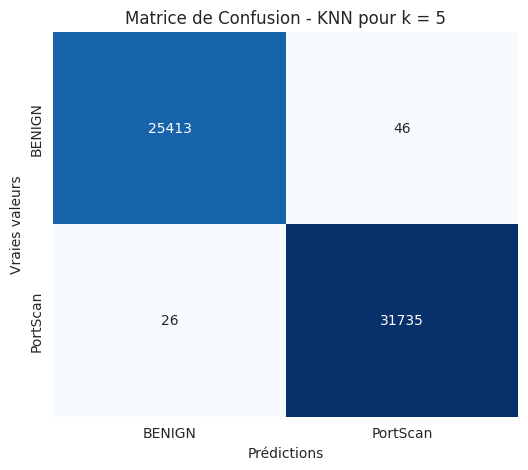

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Calculer la matrice de confusion
cm = confusion_matrix(y_test, y_pred_knn)

# Créer une figure pour afficher la matrice de confusion
plt.figure(figsize=(6, 5))

# Créer un heatmap avec Seaborn
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=['BENIGN', 'PortScan'], yticklabels=['BENIGN', 'PortScan'])

# Ajouter des labels et un titre
plt.xlabel('Prédictions')
plt.ylabel('Vraies valeurs')
plt.title('Matrice de Confusion - KNN pour k = 5')

# Afficher la matrice de confusion
plt.show()

cross-validation pour voir si le modele overfit la data

In [19]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix

# Validation croisée avec KNN
cv_scores = cross_val_score(knn, X, y, cv=5, scoring='accuracy')  # Utilisez 'accuracy' ou une autre métrique appropriée

# Affichage des scores de validation croisée
print("Scores de validation croisée :", cv_scores)
print("Moyenne des scores :", cv_scores.mean())

# Prédictions du modèle pour un ensemble de test
y_pred_knn = knn.predict(X_test)

# Matrice de confusion
print("Matrice de confusion :")
print(confusion_matrix(y_test, y_pred_knn))


Scores de validation croisée : [0.99832226 0.99839214 0.99865429 0.99192576 0.99585802]
Moyenne des scores : 0.9966304957365038
Matrice de confusion :
[[25413    46]
 [   26 31735]]


In [40]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

# Définir le modèle KNN
knn = KNeighborsClassifier()

# Définir une plage réduite pour k
param_grid = {'n_neighbors': [3, 5, 7, 9]}

# Initialiser GridSearchCV avec 3 plis et exécution parallèle
grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=3, scoring='accuracy', n_jobs=-1)

# Entraînement avec un sous-ensemble de données pour accélérer
X_small, _, y_small, _ = train_test_split(X_train, y_train, test_size=0.8, random_state=42)
grid_search.fit(X_small, y_small)

# Résultats
print(f"Meilleur k trouvé : {grid_search.best_params_['n_neighbors']}")
print("Meilleure précision obtenue : ", grid_search.best_score_)

# Prédictions sur l'ensemble de test avec le meilleur modèle trouvé
best_knn = grid_search.best_estimator_
y_pred_best_knn = best_knn.predict(X_test)

# Évaluation du modèle avec le meilleur k
from sklearn.metrics import classification_report
print("Classification Report - KNN avec meilleur k :")
print(classification_report(y_test, y_pred_best_knn))

Meilleur k trouvé : 3
Meilleure précision obtenue :  0.9968323344421441
Classification Report - KNN avec meilleur k :
              precision    recall  f1-score   support

      BENIGN       1.00      1.00      1.00     25459
    PortScan       1.00      1.00      1.00     31761

    accuracy                           1.00     57220
   macro avg       1.00      1.00      1.00     57220
weighted avg       1.00      1.00      1.00     57220

